# Regresión Lineal

Utilizaremos numpy para crear un modelo de regresión lineal desde 0

In [1]:
%matplotlib inline

from numpy import *
import matplotlib.pyplot as plt

#### Datos
Nuestro dataset será una tabla simple con dos columnas, la primera la cantidad de horas estudiadas y la segunda la nota obtenida por varios estudiantes

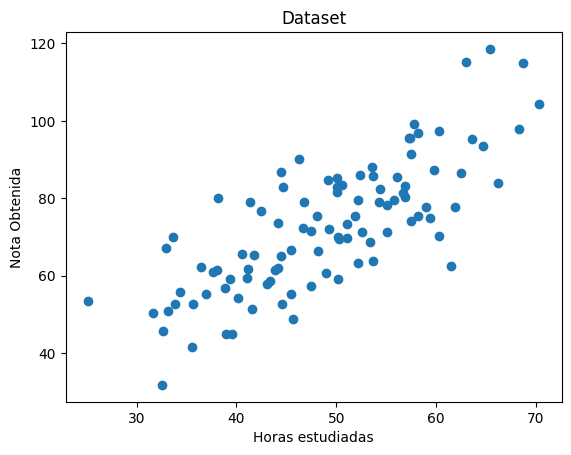

In [3]:
points = genfromtxt('students_linear_regression.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Horas estudiadas')
plt.ylabel('Nota Obtenida')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters
Como vimos la clase pasada cada modelo tiene diferentes híperparámetros
En el caso de la regresión lineal tenemos

1. Learning Rate: Cada vez que ajustamos los pesos de nuestro modelo el learning rate nos indica que tan "grande" o "pequeño" será ese ajuste
2. Initial b: Cuando hablamos de regresión lineal recuerden que tenemos un plano de 2 dimensiones y nuestro objetivo es crear una recta que se ajuste a nuestros datos. De matemáticas del colegio recordemos que una recta se define como `y = m*x + b` el híperparametro b se refiere a esta constante de la fórumula
3. Initial m lo mismo que el híperparametro anterior. `m` representa la constante de la formula de una recta. Este será el valor inicial en nuestor modelo
4. Número de Iteraciones: Cuando hablamos de machine learning recordemos que el proceso de entrenamiento puede tomar varias iteraciones hasta converger (llegar al punto optimo donde minimizamos la función de error). En este caso este híperparametro indica la cantidad de iteraciones que realizaremos

In [9]:
# Hyperparameters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 1000

#### Función de error
Cuando hablamos de machine learning y de modelos de machine learning podemos ver un patrón. Cada modelo define una función de costos o función de error.
Esta función nos indica que "tan bien" se ajusta nuestro modelo a nuestros datos.

Cada modelo tiene funciones de error diferentes que se ajustan al modelo, en este caso utilizaremos la suma de errores cuadrados para la regresión lineal.

La suma de errores cuadrados representa la distancia de cada punto de nuestros datos a la recta que estamos definiendo en el modelo de regresión lineal. Esto se suma y se le saca la raiz cuadrada para obtener el valor del error

In [10]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))

    # Suma de cuadrados de error
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2

    # Retorno el average de este error
    return total_cost/N

#### Función del descenso del gradiente
De nuevo en modelos de machine learning, tenemos pesos o valores que representan nuestro modelo, con cada iteración tenemos que revisar la función de error y ajustar nuestro modelo conforme al error que obtuvimos.

En el caso de regresión lineal vamos a utilizar el descenso del gradiente. Recordemos que el gradiente es básicamente buscar la derivada de la función de error para intentar llegar al punto óptimo

In [14]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    # Para cada iteración tomamos m y b para optimizarlos con respecto a la función de error
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

        if (cost_graph[-1] < 200):
          break

    return [b, m, cost_graph]

# Esta función nos ayuda a actualizar los valores de m y b
def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    # Calculo que el gradiente que básicamente representa la diferencia de m y de b necesaria para que todos los puntos se calculen correctamente
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    # Actualizamos m y b. Recuerden el learning_rate que indica que tan rápido vamos a actualizar estos parámetros
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    # Retorno los valores actualizados
    return b_updated, m_updated

#### Corremos la función de entrenamiento
Corriendo la función de entrenamiento obtenemos `m` y `b` optimizados para nuestro dataset

In [15]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

# Imprimimos los valores optimizados
print ('Optimized b:', b)
print ('Optimized m:', m)

# Imprimimos el error con los parámetros optimizados
# Esto básicamente nos indica el desempeño de nuestro modelo
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.027467789559144355
Optimized m: 1.385283255651245
Minimized cost: 134.50591058200533


#### Gráfica de error por cada iteración
Podemos ver como el error se reduce con cada iteración, esto gracias al descenso del gradiente que nos ayuda a actualizar los parámetros `m` y `b`

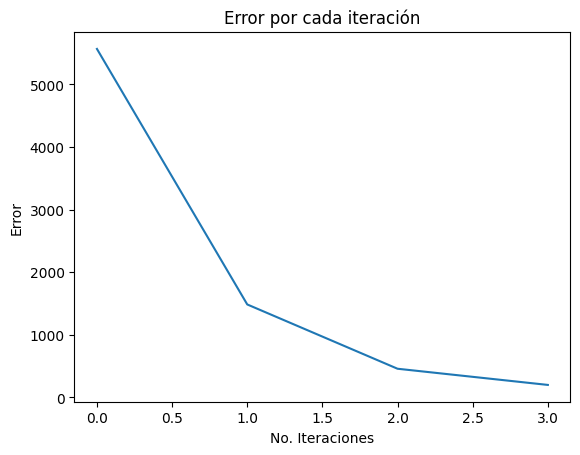

In [16]:
plt.plot(cost_graph)
plt.xlabel('No. Iteraciones')
plt.ylabel('Error')
plt.title('Error por cada iteración')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Graficamos el resultado de nuestro modelo
Recordemos que nuestro modelo de regresión lineal representa una recta en un plano 2D. Esta recta está dada por `y = m*x + b`

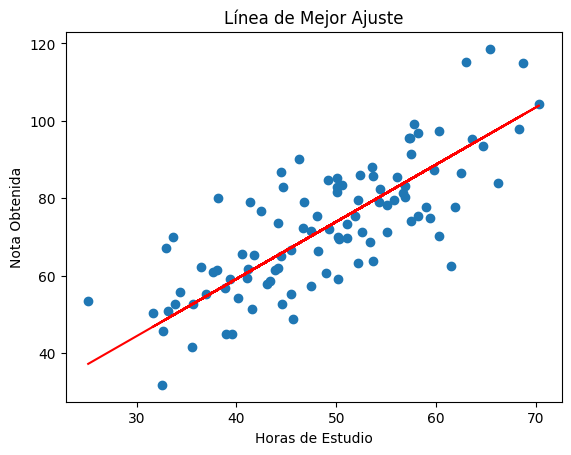

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota Obtenida')
plt.title('Línea de Mejor Ajuste')
plt.show()